I love reading The Onion. The brilliant snark of their universally caustic takes on politics and everyday life make me feel less alone in reacting to the utter bizarreness of modern life.

It is a reflection of the weirdness of our reality that Onion headlines so frequently get mistaken for real ones. There are plenty of stories about celebrities, politicians, and other public figures getting fooled by and inciting outrage over stories that in hindsight seem like they would be too obviously absurd to be taken seriously. But are they? Could an algorithm tell the difference?

In this project, I'll be tackling just that question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Obtain

First, we need a source of these headlines. As a seed, I'll be using a collection of headlines from The Onion and the Huffington Post. These were collected for sarcasm classification. I have some qualms with the appropriateness of this data for that purpose -- it is not entirely clear to me or I think to anyone that sarcasm and satire/parody are the same thing. Perhaps there is some intersection, but the line is fuzzy. Still, for *our* purposes, this is a good dataset.

In [2]:
sarcasm = pd.read_json('../data/raw/Sarcasm_Headlines_Dataset.json', lines=True)

In [3]:
sarcasm.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    26709 non-null object
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [5]:
sarcasm['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

This is promising. We have rows with the article link and lowercased headline, and whether a headline is 'sarcastic' or not. I don't believe that sarcastic is a good way to characterize this, so I'll just alter that for my own happiness.

In [6]:
sarcasm.columns = ['article_link', 'headline', 'is_parody']
sarcasm.head()

,article_link,headline,is_parody
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


I know from some previous exploration that this dataset includes some articles that are linked through the Huffington Post, but not from the Huffington Post. Some of these might be parody articles themselves, and so might be miscoded. Let's make sure.

In [7]:
sarcasm.loc[sarcasm['article_link'].str.contains('comhttp')]

,article_link,headline,is_parody
12,https://www.huffingtonpost.comhttp://www.thegu...,north korea praises trump and urges us voters ...,0
23,https://www.huffingtonpost.comhttp://pubx.co/d...,this is why you shouldn't go to the circus,0
54,https://www.huffingtonpost.comhttp://www.wsj.c...,donald trump wouldn't have had the ready cash ...,0
131,https://www.huffingtonpost.comhttp://www.balti...,councilman calls on baltimore rappers to inspi...,0
159,https://www.huffingtonpost.comhttps://www.wash...,megyn kelly on donald trump: 'i have done my l...,0
166,https://www.huffingtonpost.comhttp://baltimore...,'the wire' cast reunited in baltimore to uplif...,0
175,https://www.huffingtonpost.comhttps://www.wash...,donald trump's assault on our values,0
178,https://www.huffingtonpost.comhttp://www.polit...,gop senators aren't ready to accept trump as t...,0
216,https://www.huffingtonpost.comhttp://pubx.co/i...,rubio supporters get in a scuffle with a 'rubi...,0
395,https://www.huffingtonpost.comhttp://pubx.co/V...,rescued lion has been obsessed with blankets s...,0


In [8]:
len('https://www.huffingtonpost.com')

30

In [9]:
sarcasm.loc[sarcasm['article_link'].str.contains('comhttp'), 'article_link'] = sarcasm.loc[sarcasm['article_link'].str.contains('comhttp'), 'article_link'].str[30:]

In [10]:
sarcasm.loc[(sarcasm['article_link'].str.contains('onion')) & (sarcasm['is_parody'] == 0)]

,article_link,headline,is_parody
15777,https://www.huffingtonpost.com/entry/the-onion...,the onion is getting into the movie business,0
19948,http://www.theonion.com/blogpost/do-you-know-w...,"do you know why i'm pulling you over, being wi...",0
21677,https://www.huffingtonpost.com/entry/sunions-t...,we tested the new 'tearless' onions to see if ...,0


In [11]:
sarcasm.iloc[19948, 2] = 1

In [61]:
parody = sarcasm[sarcasm['is_parody'] == 1]
type(parody)

pandas.core.frame.DataFrame

In [62]:
parody.to_csv('../data/processed/parody.csv')

# Word2Vec

In [12]:
from gensim.models import Word2Vec
from keras.preprocessing import text, sequence
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [13]:
y = sarcasm['is_parody'].values

In [14]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [22]:
X_train, X_test, y_train, y_test = train_test_split(sarcasm['headline'], y, test_size=.20)

In [23]:
type(X_train)

pandas.core.series.Series

In [24]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

In [25]:
total_word_counts = [len(headline) for headline in list_tokenized_train]

(array([2.000e+00, 2.300e+01, 1.350e+02, 2.840e+02, 5.120e+02, 9.790e+02,
        1.380e+03, 1.920e+03, 2.377e+03, 2.640e+03, 2.660e+03, 2.481e+03,
        2.054e+03, 1.437e+03, 9.470e+02, 6.090e+02, 3.970e+02, 2.350e+02,
        1.320e+02, 6.400e+01, 3.700e+01, 2.900e+01, 1.500e+01, 6.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  0.975,  1.95 ,  2.925,  3.9  ,  4.875,  5.85 ,  6.825,
         7.8  ,  8.775,  9.75 , 10.725, 11.7  , 12.675, 13.65 , 14.625,
        15.6  , 16.575, 17.55 , 18.525, 19.5  , 20.475, 21.45 , 22.425,
        23.4  , 24.375, 25.35 , 26.325, 27.3  , 28.275, 29.25 , 30.225,
        31.2  , 32.175, 33.15 , 34.125, 35.1  , 36.075, 37.05 , 38.025,
        39.   ]),
 <a list of 40 Patch objects>)

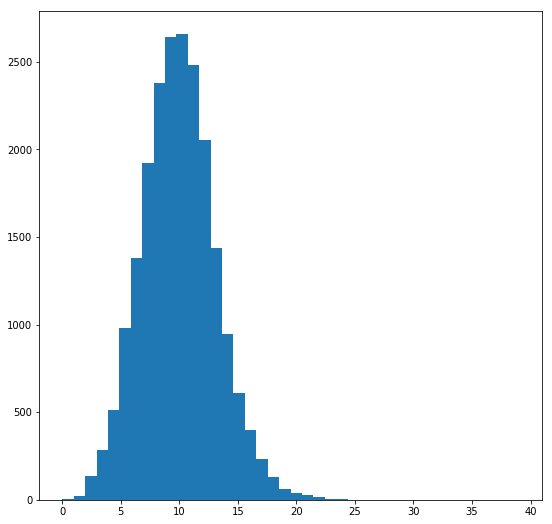

In [26]:
fig, ax = plt.subplots(figsize=(9,9))
ax.hist(total_word_counts, bins = 40)

In [27]:
max(total_word_counts)

39

In [28]:
counter = pd.Series(total_word_counts)
counter.value_counts()

10    2660
9     2640
11    2481
8     2377
12    2054
7     1920
13    1437
6     1380
5      979
14     947
15     609
4      512
16     397
3      284
17     235
2      135
18     132
19      64
20      37
21      29
1       23
22      15
23       6
24       4
0        2
36       1
39       1
26       1
27       1
28       1
29       1
30       1
31       1
dtype: int64

In [29]:
maxlen = 18
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [30]:
X_t.shape

(21367, 18)

In [32]:
tokens = tokenizer.sequences_to_texts(list_tokenized_train) + tokenizer.sequences_to_texts(list_tokenized_test)

In [33]:
tokens = [t.split(' ') for t in tokens]

In [34]:
tokens[:1]

[['my', 'modest', 'proposal']]

In [35]:
model = Word2Vec(tokens, size=100, window=5, min_count=1, workers=4)

model.train(tokens, total_examples=model.corpus_count, epochs=10)

(2282658, 2576000)

In [36]:
embeddings = model.wv

In [37]:
keras_weights = embeddings.get_keras_embedding()

In [38]:
embeddings.most_similar(positive=['obama', 'policy'])

[('naacp', 0.9267419576644897),
 ("chief'", 0.9261459708213806),
 ('immunity', 0.924971878528595),
 ('border', 0.9245989322662354),
 ('biden', 0.9219706654548645),
 ("'predator", 0.9195743799209595),
 ('invokes', 0.9188481569290161),
 ('moore', 0.9186716079711914),
 ('perez', 0.9184410572052002),
 ('boehner', 0.917568027973175)]

In [49]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers

In [51]:
model = Sequential()
model.add(keras_weights)
model.add(Conv1D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling1D())
model.add(Conv1D(64, 3, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 64)          19264     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 64)          12352     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
__________

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

In [52]:
batch_size = 256 
num_epochs = 30

In [53]:
hist = model.fit(X_t, y_train, batch_size=batch_size, epochs=num_epochs, validation_split=0.1, shuffle=True, verbose=2)

Train on 19230 samples, validate on 2137 samples
Epoch 1/30
 - 3s - loss: 0.6687 - acc: 0.5902 - val_loss: 0.5758 - val_acc: 0.6785
Epoch 2/30
 - 2s - loss: 0.5663 - acc: 0.6993 - val_loss: 0.5175 - val_acc: 0.6996
Epoch 3/30
 - 2s - loss: 0.5250 - acc: 0.7320 - val_loss: 0.4753 - val_acc: 0.7567
Epoch 4/30
 - 2s - loss: 0.5001 - acc: 0.7486 - val_loss: 0.4564 - val_acc: 0.7763
Epoch 5/30
 - 2s - loss: 0.4890 - acc: 0.7529 - val_loss: 0.4682 - val_acc: 0.7482
Epoch 6/30
 - 2s - loss: 0.4745 - acc: 0.7611 - val_loss: 0.4458 - val_acc: 0.7852
Epoch 7/30
 - 2s - loss: 0.4658 - acc: 0.7663 - val_loss: 0.4534 - val_acc: 0.7656
Epoch 8/30
 - 2s - loss: 0.4592 - acc: 0.7716 - val_loss: 0.4443 - val_acc: 0.7763
Epoch 9/30
 - 2s - loss: 0.4436 - acc: 0.7865 - val_loss: 0.4367 - val_acc: 0.7745
Epoch 10/30
 - 2s - loss: 0.4400 - acc: 0.7839 - val_loss: 0.4607 - val_acc: 0.7548
Epoch 11/30
 - 2s - loss: 0.4320 - acc: 0.7918 - val_loss: 0.4292 - val_acc: 0.7955
Epoch 12/30
 - 2s - loss: 0.4251 - a

In [54]:
y_pred = model.predict(X_te)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
def rounder(array):
    new = []
    for i in array:
        if i >= .5:
            new.append(1)
        else:
            new.append(0)
    return np.array(new)

In [57]:
y_pred_bin = rounder(y_pred)

In [58]:
accuracy_score(y_test, y_pred_bin)

0.7785473605391239